# Dynamic Mode Decomposition with Control (DMDc)

Importazione delle librerie necessarie e del metodo DMDc dalla libreria PyDMD.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math

from pydmd import DMDc
from sklearn.metrics import mean_squared_error
#from pydmd.plotter import plot_eigs

import numpy as np
import matplotlib.pyplot as plt
from numpy import dot, multiply, diag, power
from numpy import pi, exp, sin, cos
from numpy.linalg import inv, eig, pinv, solve
from scipy.linalg import svd, svdvals
from math import floor, ceil # python 3.x

import scipy.io

Selezione del dataset da utilizzare.

In [2]:
# Parametri per dataset real_eig_timeseries.mat e complex_eig_timeseries.mat
#x = np.linspace(0, 10, 10)
#t = np.linspace(0, 1600, 1600)

# Parametri per dataset XU_DMDc.mat
x = np.linspace(0, 40, 40)
t = np.linspace(0, 7160, 7160)

# Scelta del dataset, se a valori complessi o reali
#D_mat = scipy.io.loadmat('real_eig_timeseries.mat')
#D_mat = scipy.io.loadmat('complex_eig_timeseries.mat')
D_mat = scipy.io.loadmat('XU_DMDc.mat')

# Trasformo il formato .mat in un Numpy Array
# Cambiare l'argomento di D_mat['xt'] in D_mat['X'] se si usa il dataset XU_DMDc.mat
D_mat_list = [[element for element in upperElement] for upperElement in D_mat['X']]
U_mat_list = [[element for element in upperElement] for upperElement in D_mat['U']]
D = np.array(D_mat_list)
U = np.array(U_mat_list)

# extract input-output matrices
X = D[:,:-1]
Y = D[:,1:]
U = U[:,:]

Esecuzione del metodo DMDc.

In [3]:
dmdc = DMDc(svd_rank=-1)
D0 = D[:,:]
U0 = U[:,1:]
dmdc.fit(D0,U0)

Plot della matrice iniziale e della matrice ricostruita tramite DMDc.

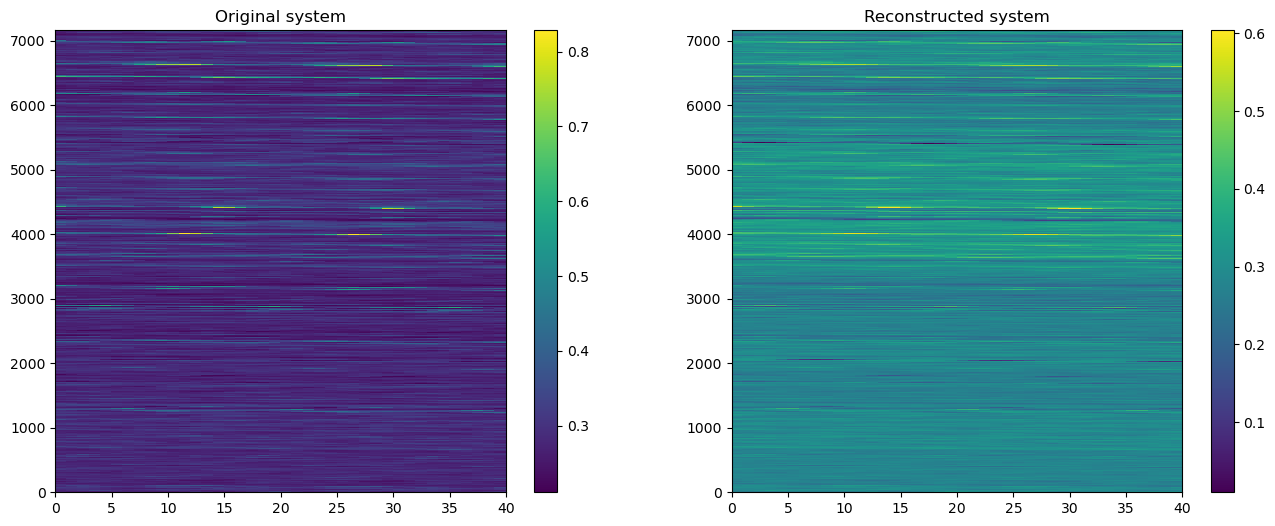

In [4]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.title("Original system")
plt.pcolor(X.real.T)
plt.colorbar()

plt.subplot(122)
plt.title("Reconstructed system")
plt.pcolor(dmdc.reconstructed_data().real.T)
plt.colorbar()

plt.show()

Trasformo la matrice del dataset e la matrice della ricostruzione in array ad una dimensione.

In [5]:
D0 = D[0,:]
DMDc0 = dmdc.reconstructed_data()[0,:]

Plotto l'andamento temporale sia del dataset che della ricostruzione e ne calcolo la differenza tra i due.

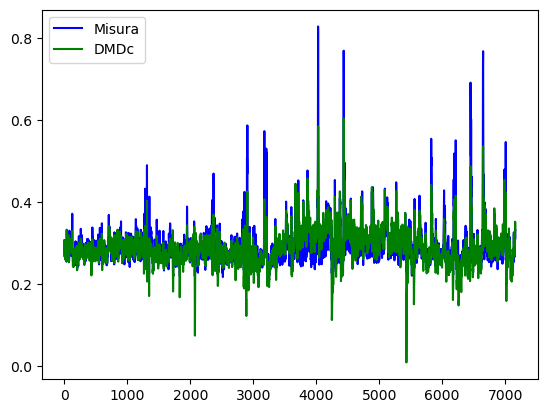

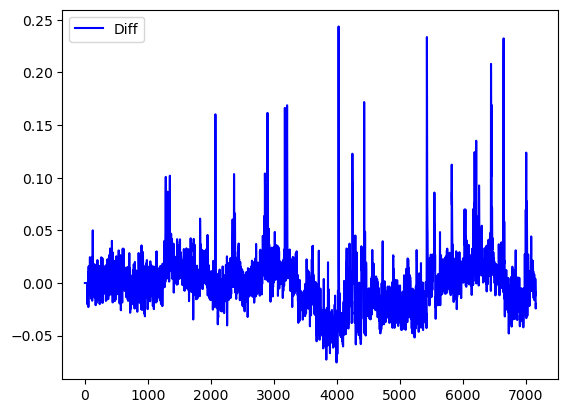

In [6]:
plt.figure()
plt.plot(t, D0, 'b', label='Misura')
plt.plot(t, DMDc0.real, 'g', label='DMDc')
plt.legend()
plt.show()

plt.figure()
error=np.array(D0) - np.array(DMDc0.real)
plt.plot(t, error, 'b', label='Diff')
plt.legend()
plt.show()

Calcolo il coefficiente di determinazione (R^2), l'errore percentuale assoluto medio (MAPE) e la radice dell'errore quadratico medio (MSE).

In [7]:
# Coefficiente di determinazione (R^2), valore tra [0,1]
corr_matrix = np.corrcoef(D0, DMDc0)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(np.abs(R_sq))

0.678548788914011


In [8]:
# MAPE : Errore Percentuale Assoluto Medio, valore tra [0,1]
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

MAPE = mape(D0,DMDc0)
print(MAPE)

0.06069086239074132


In [9]:
# Radice dell'errore quadratico medio
MSE = mean_squared_error(np.abs(D0),np.abs(DMDc0))
print(math.sqrt(MSE))

0.026349659962563977
